In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset_train=pd.read_csv('Google_Stock_Price_Train.csv')
training_set=dataset_train.iloc[:,1:2].values

In [3]:
print(training_set)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


In [4]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)

In [5]:
print(training_set_scaled)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


In [6]:
x_train = []
y_train = []
for i in range(60, 1258):
    x_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [7]:
print(x_train)

[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]


In [8]:
print(y_train)

[0.08627874 0.08471612 0.07454052 ... 0.95725128 0.93796041 0.93688146]


In [9]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [10]:
print(x_train)

[[[0.08581368]
  [0.09701243]
  [0.09433366]
  ...
  [0.07846566]
  [0.08034452]
  [0.08497656]]

 [[0.09701243]
  [0.09433366]
  [0.09156187]
  ...
  [0.08034452]
  [0.08497656]
  [0.08627874]]

 [[0.09433366]
  [0.09156187]
  [0.07984225]
  ...
  [0.08497656]
  [0.08627874]
  [0.08471612]]

 ...

 [[0.92106928]
  [0.92438053]
  [0.93048218]
  ...
  [0.95475854]
  [0.95204256]
  [0.95163331]]

 [[0.92438053]
  [0.93048218]
  [0.9299055 ]
  ...
  [0.95204256]
  [0.95163331]
  [0.95725128]]

 [[0.93048218]
  [0.9299055 ]
  [0.93113327]
  ...
  [0.95163331]
  [0.95725128]
  [0.93796041]]]


In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [12]:
regressor = Sequential()

In [13]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [14]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [15]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [16]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [17]:
regressor.add(Dense(units=1))

In [18]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [19]:
regressor.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 19s 129ms/step - loss: 0.0390
Epoch 2/100
38/38 [==============================] - 5s 131ms/step - loss: 0.0060
Epoch 3/100
38/38 [==============================] - 6s 145ms/step - loss: 0.0055
Epoch 4/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0055
Epoch 5/100
38/38 [==============================] - 5s 136ms/step - loss: 0.0053
Epoch 6/100
38/38 [==============================] - 7s 185ms/step - loss: 0.0052
Epoch 7/100
38/38 [==============================] - 5s 140ms/step - loss: 0.0046
Epoch 8/100
38/38 [==============================] - 5s 125ms/step - loss: 0.0052
Epoch 9/100
38/38 [==============================] - 6s 149ms/step - loss: 0.0052
Epoch 10/100
38/38 [==============================] - 6s 159ms/step - loss: 0.0050
Epoch 11/100
38/38 [==============================] - 5s 135ms/step - loss: 0.0042
Epoch 12/100
38/38 [==============================] - 6s 150ms/step - loss: 0.0042
Epoch 13/100

In [20]:
dataset_test=pd.read_csv('Google_Stock_Price_test.csv')
test_set=dataset_test.iloc[:,1:2].values

In [21]:
print(test_set)

[[778.81]
 [788.36]
 [786.08]
 [795.26]
 [806.4 ]
 [807.86]
 [805.  ]
 [807.14]
 [807.48]
 [807.08]
 [805.81]
 [805.12]
 [806.91]
 [807.25]
 [822.3 ]
 [829.62]
 [837.81]
 [834.71]
 [814.66]
 [796.86]]


In [22]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 1s 1s/step


In [23]:
print(predicted_stock_price)

[[776.7712 ]
 [773.8035 ]
 [773.87836]
 [775.1655 ]
 [778.3245 ]
 [784.01404]
 [789.20087]
 [791.1047 ]
 [791.159  ]
 [790.8225 ]
 [790.6592 ]
 [790.5517 ]
 [790.525  ]
 [791.2067 ]
 [792.32043]
 [797.1014 ]
 [804.20917]
 [811.6566 ]
 [815.4757 ]
 [810.9386 ]]


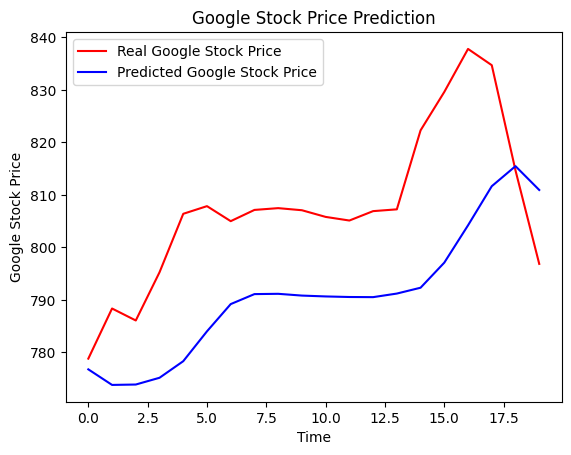

In [25]:
plt.plot(test_set, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()